# Introduction

This data are for an electronics shop, it contains sales for year 2019, a csv file for each month
each dataset cosists of 6 columns ['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']
This notebook visualizes the data and answers some questions on the data provided

# Installing Libraries

In [1]:
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install regex -q

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import re
%matplotlib inline

# Reading Data

In [3]:
# Merge the data of all months

files = [file for file in os.listdir('./Sales_Data')] # get all datasets files names
all_months_data = pd.DataFrame() # empty dataframe to concat the read data
try:# since I will strore the concatenated data in the same directory this would raise error is the cell is ran twice
    for file in files:
        df = pd.read_csv('./Sales_Data/'+file) 
        df['months'] = re.findall("(?:_)(\w+)(?:_)",file)[0] # extract the month name from the file name
        all_months_data = pd.concat([all_months_data, df]) # concat the read data with the previous ones

    print("number of duplicates in the data: ",all_months_data.duplicated().sum()) # check for duplicates in the data
    all_months_data.drop_duplicates(inplace = True)  # drop duplicates
    all_months_data.dropna(inplace = True) # drop missing values in the dataframe that occurred durnig concatenating
    all_months_data.to_csv('./Sales_Data/all_data.csv', index = False) # save the new concatenated data
except: # if the new data file already exists, read it instead
    df = pd.read_csv('./Sales_Data/all_data.csv')


In [4]:
df = pd.read_csv('./Sales_Data/all_data.csv')
print("number of duplicates in the data: ",df.duplicated().sum())

number of duplicates in the data:  0


# Data Preprocessing

In [5]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",October
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",October
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",October
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",October
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",October


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185698 entries, 0 to 185697
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185698 non-null  object
 1   Product           185698 non-null  object
 2   Quantity Ordered  185698 non-null  object
 3   Price Each        185698 non-null  object
 4   Order Date        185698 non-null  object
 5   Purchase Address  185698 non-null  object
 6   months            185698 non-null  object
dtypes: object(7)
memory usage: 9.9+ MB


some columns should have types of int or float but they don't, like:
Quantity Ordered and Price Each, also Prder Date should have datetime
type but we need to make sure and it it's not, we need to convert it


In [7]:
###   Quantity Ordered

df['Quantity Ordered'].unique()

array(['1', '2', '3', '4', '5', 'Quantity Ordered', '8', '6', '7', '9'],
      dtype=object)

In [8]:
# so there are strings in Quantity Ordered that's maybe a result of
# the concatination of dataframes, so lets drop these rows and then
# change the type of it


df.drop(df[df['Quantity Ordered']=='Quantity Ordered'].index, inplace = True)
df['Quantity Ordered'].unique()

array(['1', '2', '3', '4', '5', '8', '6', '7', '9'], dtype=object)

In [9]:
# Quantity Ordered should be integer but for Price Each it has some values with
# float point, so it's better to change its type to float instead

df['Quantity Ordered'] = df['Quantity Ordered'].astype('int')
df['Price Each'] = df['Price Each'].astype('float')
# create the sales for each row by multiplying the Quantity Ordered
# and Price Each, that would represent total amoutn of money

df['sales'] = df['Quantity Ordered'] * df['Price Each']

In [10]:
# now it's time to handle Order Date type

print("type of Order Date Columns is:", type(df['Order Date'][0]))
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order Date'].head()

type of Order Date Columns is: <class 'str'>


0   2019-10-28 10:56:00
1   2019-10-28 17:26:00
2   2019-10-24 17:20:00
3   2019-10-14 22:26:00
4   2019-10-07 16:10:00
Name: Order Date, dtype: datetime64[ns]

In [36]:
###   Address Columns

df['Purchase Address']

0                   609 Cherry St, Dallas, TX 75001
1                 225 5th St, Los Angeles, CA 90001
2              967 12th St, New York City, NY 10001
3         628 Jefferson St, New York City, NY 10001
4                534 14th St, Los Angeles, CA 90001
                            ...                    
185693             235 Center St, Seattle, WA 98101
185694          926 9th St, San Francisco, CA 94016
185695             868 Hickory St, Boston, MA 02215
185696              204 Adams St, Seattle, WA 98101
185697                 43 5th St, Atlanta, GA 30301
Name: Purchase Address, Length: 185686, dtype: object

In [37]:
# Extract city and state frmo the address columns
df['state'] = df['Purchase Address'].str.extract(r"(?:.*,\s*)(\w+)")
df['city'] = df['Purchase Address'].str.extract(r"(?:St, )(.*)(?:,\s.*)")

# Data Exploration

## Q1: What was the best month for sales

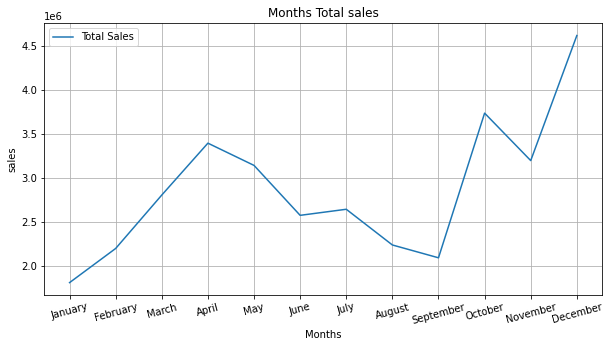

In [54]:
# Now we are ready to go
# I will do it by calculating the average sales for each month and draw a histogram to visualize it

means = df.groupby('months')['sales'].agg('sum')
# Let's sort the values by the order of months 
means = means.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
               'October', 'November', 'December'])

plt.figure(figsize = (10,5))
plt.plot(means)
plt.xticks(rotation = 15)
plt.title("Months Total sales")
plt.xlabel("Months")
plt.ylabel("sales")
plt.grid()
plt.legend(['Total Sales'])
plt.show()

So according to the line plot above, the best month for sales was December with total sales of more than 4,500,000$
we also can see the trend in the sales, total sales was increasing starting from January till April, then started decreasing till it reached the least amount in September, and then started to increase again with the best sales to be in December

## Q1: What City had the highest number of sales?

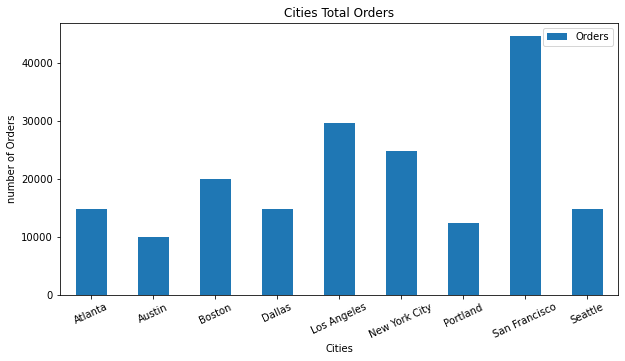

In [45]:
plt.figure(figsize = (10,5))

num_sales = df.groupby('city')['Order ID'].agg('count').plot(kind = 'bar')
plt.xticks(rotation = 25)
plt.title("Cities Total Orders")
plt.xlabel("Cities")
plt.ylabel("number of Orders")
plt.legend(["Orders"])
plt.show()

So the data we have contains orders for few unique Cities shown in the graph above
The City with the largest number of orders was San Francisco with more than 40000 orders, then Los Angeles with almost 30000 orders, etc.
Since this data is for electronics shop, it could be used to know in what cities the shop should have more branches to meet the market needs

## Q3: For each month, what is the most sold product

In [47]:
# most sold product in each month
products = df.groupby('months')['Product'].value_counts().unstack()

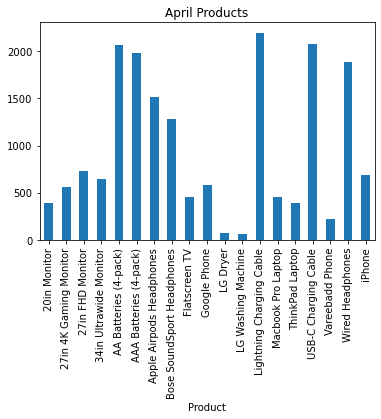

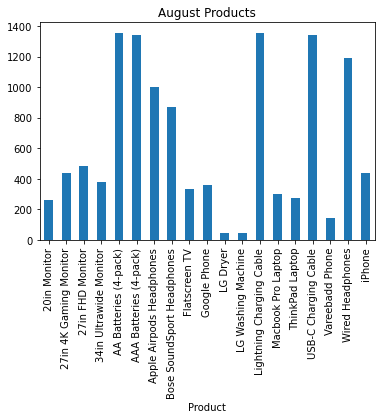

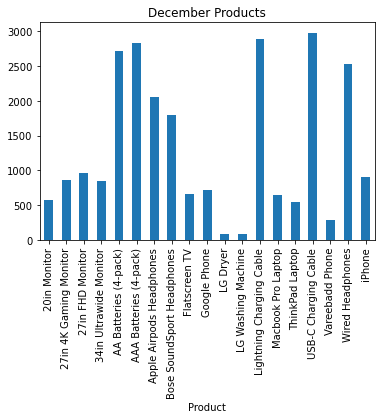

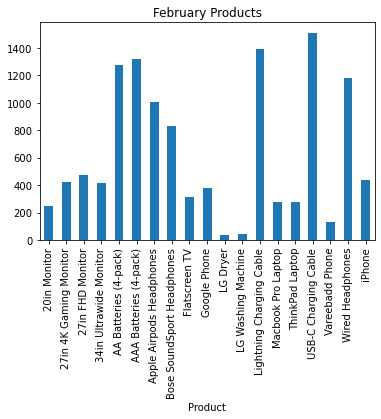

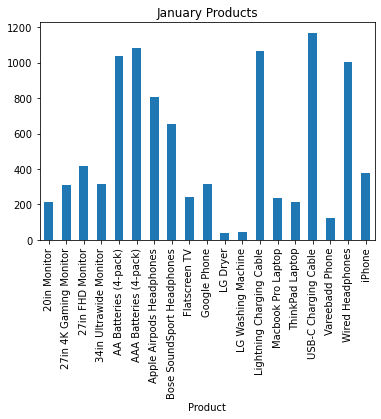

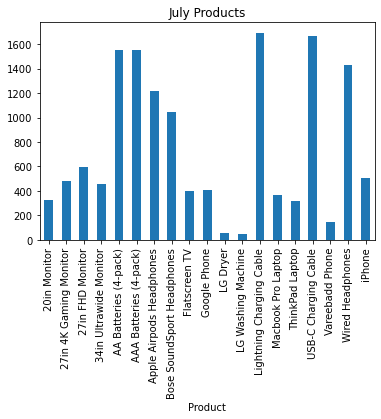

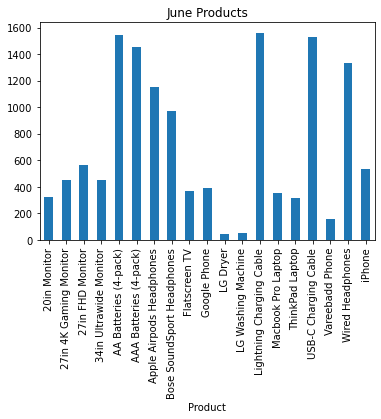

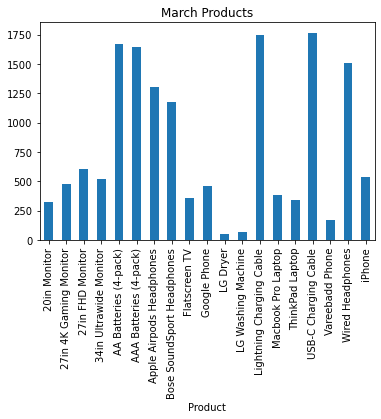

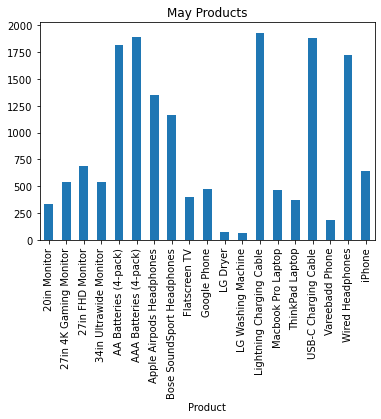

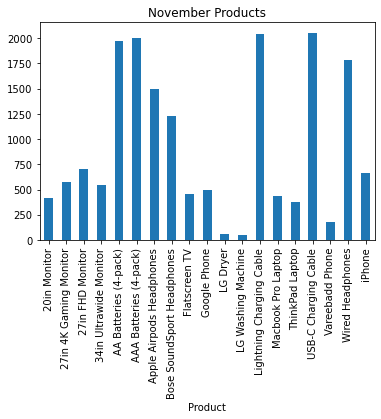

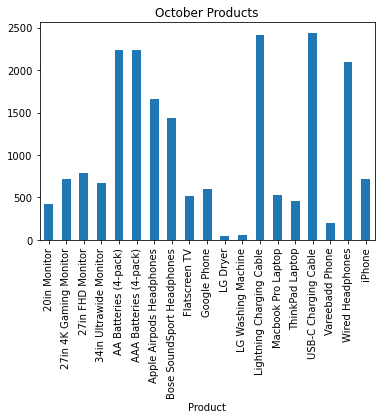

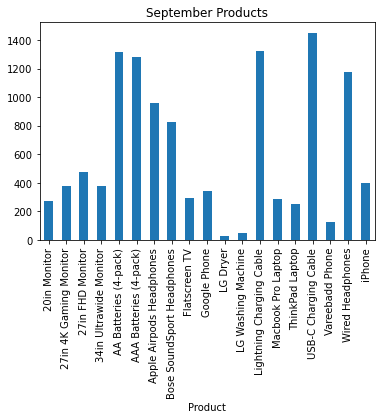

In [49]:
idx = 0
for idx in range(12):
    products.loc[products.index[idx], :].plot(kind = 'bar')
    plt.title(products.index[idx]+" Products")
    plt.show()

## Q3: What time should the shop display advertisments to maximize liklihood of cutomer's buying products?

In [50]:
# for this question we create new column 'Hour' represents the hour the order was made
df['Hour'] = df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,sales,state,city,Hour
0,259358,34in Ultrawide Monitor,1,379.99,2019-10-28 10:56:00,"609 Cherry St, Dallas, TX 75001",October,379.99,TX,Dallas,10
1,259359,27in 4K Gaming Monitor,1,389.99,2019-10-28 17:26:00,"225 5th St, Los Angeles, CA 90001",October,389.99,CA,Los Angeles,17
2,259360,AAA Batteries (4-pack),2,2.99,2019-10-24 17:20:00,"967 12th St, New York City, NY 10001",October,5.98,NY,New York City,17
3,259361,27in FHD Monitor,1,149.99,2019-10-14 22:26:00,"628 Jefferson St, New York City, NY 10001",October,149.99,NY,New York City,22
4,259362,Wired Headphones,1,11.99,2019-10-07 16:10:00,"534 14th St, Los Angeles, CA 90001",October,11.99,CA,Los Angeles,16


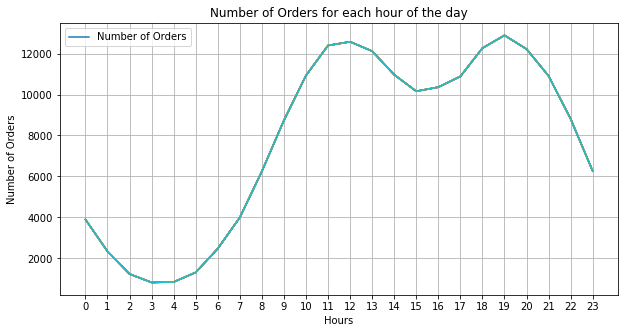

In [56]:
plt.figure(figsize=(10,5))
hours = df.groupby('Hour').groups.keys()
plt.plot(hours, df.groupby(['Hour']).count())
plt.xticks(list(hours))
plt.xlabel("Hours")
plt.ylabel("Number of Orders")
plt.title("Number of Orders for each hour of the day")
plt.grid()
plt.legend(['Number of Orders'])
plt.show()

The Hour column values are in 24-hour format, so 0 means 12:00 AM and 23 means 11:00 PM in 12-hour format
starting from 3:00 AM the customers often buy orders will 12:00 PM then number of orders decrease a little but then returned to increase till it's the maximum at 7:00 PM then it decreases
I can feel the trend in the data and the correlation between it and the work hours of the day
so the graph shows that if the shop website would display advertisments, it would be better to be at 7:00 PM since it's the time with maximum number of orders.

## Q4: What Products are most often sold together?

In [57]:
# each order has Order ID, so I someone ordered more than one product at the same time, those products will have
# the same Order ID number, so to answer this question we will group the data by Order ID then count for each pair
# how often it was ordered

same_ordered = df[df['Order ID'].duplicated(keep = False)]

In [64]:
# Create new Column Grouped to store products in the same order by joining them with ','
same_ordered['Grouped'] = same_ordered.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# now due to the new column we created in the dataframe, the Grouped values are repeated for each order in each group
# so we need to drop duplicates to avoid misleading results

grouped = same_ordered[['Order ID', 'Grouped']].drop_duplicates()
grouped.head(7)

<ipython-input-64-2bf9c1e9f316>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  same_ordered['Grouped'] = same_ordered.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
62,259420,"Google Phone,USB-C Charging Cable"
65,259422,"Google Phone,USB-C Charging Cable"
82,259438,"iPhone,Lightning Charging Cable"
103,259458,"34in Ultrawide Monitor,ThinkPad Laptop"
123,259477,"LG Dryer,AAA Batteries (4-pack)"
176,259529,"iPhone,Apple Airpods Headphones,Wired Headphones"
186,259537,"AAA Batteries (4-pack),USB-C Charging Cable"


In [67]:
# To answer the question, I will use combinations to create combinations of k {for the sake of this question, k = 2}
# and use Counter to count number of occurrences of these combinations.

from itertools import combinations
from collections import Counter

count = Counter()

for row in grouped['Grouped']:
    row_list = row.split(',') # list of products for each Order
    count.update(Counter(combinations(row_list, 2))) # update the counter of the combinations of the products
    
for key, value in count.most_common(10):
    print(key,"Occurred ", str(value)+" time")

('iPhone', 'Lightning Charging Cable') Occurred  1002 time
('Google Phone', 'USB-C Charging Cable') Occurred  985 time
('iPhone', 'Wired Headphones') Occurred  447 time
('Google Phone', 'Wired Headphones') Occurred  413 time
('Vareebadd Phone', 'USB-C Charging Cable') Occurred  361 time
('iPhone', 'Apple Airpods Headphones') Occurred  360 time
('Google Phone', 'Bose SoundSport Headphones') Occurred  220 time
('USB-C Charging Cable', 'Wired Headphones') Occurred  159 time
('Vareebadd Phone', 'Wired Headphones') Occurred  143 time
('Lightning Charging Cable', 'Wired Headphones') Occurred  92 time


TypeError: unhashable type: 'numpy.ndarray'

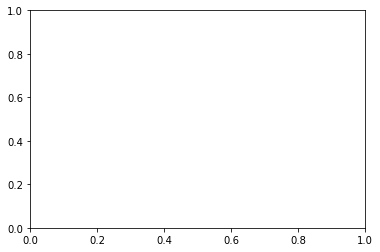

In [91]:
top10 = count.most_common(10)
values = list([top10[i][1] for i in range(10)])
ticks = list([top10[i][0] for i in range(10)])
#plt.bar(ticks, values)

In [92]:
# What product sold the most? Why do you think it's sold the most?

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,months,sales,state,city,Hour
0,259358,34in Ultrawide Monitor,1,379.99,2019-10-28 10:56:00,"609 Cherry St, Dallas, TX 75001",October,379.99,TX,Dallas,10
1,259359,27in 4K Gaming Monitor,1,389.99,2019-10-28 17:26:00,"225 5th St, Los Angeles, CA 90001",October,389.99,CA,Los Angeles,17
2,259360,AAA Batteries (4-pack),2,2.99,2019-10-24 17:20:00,"967 12th St, New York City, NY 10001",October,5.98,NY,New York City,17
3,259361,27in FHD Monitor,1,149.99,2019-10-14 22:26:00,"628 Jefferson St, New York City, NY 10001",October,149.99,NY,New York City,22
4,259362,Wired Headphones,1,11.99,2019-10-07 16:10:00,"534 14th St, Los Angeles, CA 90001",October,11.99,CA,Los Angeles,16


In [93]:
product_group = df.groupby('Product')
quntity_ordered = product_group.sum()['Quantity Ordered']
prices = df.groupby('Product').mean()['Price Each']


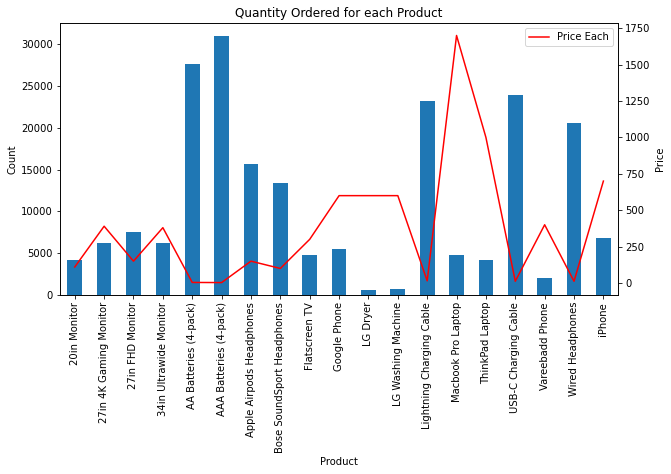

In [95]:
fig, ax1 = plt.subplots(figsize = (10,5))
ax2 = ax1.twinx()
quntity_ordered.plot(kind = 'bar', ax = ax1)
prices.plot(ax = ax2, color = 'r')
ax1.set_ylabel("Count")
ax2.set_ylabel("Price")
plt.title("Quantity Ordered for each Product")
ax2.legend()
plt.show()